In [4]:
#KNN algorithm with standard scaling.
import os



In [4]:
import pandas as pd
df = pd.read_csv('dia.csv')
print(df.head())



   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [5]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 767 rows and 9 columns


In [6]:
#renaming column names for better understanding 
df.columns = ["pregnancies", "glucose", "blood_pressure", "skin_thickness","insulin","bmi","Diabetes_Pedigree_Function","age","outcome"]
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
df.info()
# It seems that data has no any null entry. However missing value can be encoded in number of different ways.
#skin_thickness equal to zero, glucose equal to zero.Here zero,for all intent and purposes, is a missing value.


In [12]:
#handling missing data 
import numpy as np
df.glucose.replace(0,np.nan,inplace = True)
df.insulin.replace(0,np.nan,inplace = True)
df.blood_pressure.replace(0,np.nan,inplace = True)
df.bmi.replace(0,np.nan,inplace = True)
df.skin_thickness.replace(0,np.nan,inplace = True)
df.age.replace(0,np.nan,inplace = True)
df.Diabetes_Pedigree_Function.replace(0,np.nan,inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
pregnancies                   767 non-null int64
glucose                       762 non-null float64
blood_pressure                732 non-null float64
skin_thickness                540 non-null float64
insulin                       394 non-null float64
bmi                           756 non-null float64
Diabetes_Pedigree_Function    767 non-null float64
age                           767 non-null int64
outcome                       767 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.0 KB


In [11]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0


In [13]:
#filling the NaN values with mean value, mainly targetting skin_thickness.
df = df.fillna(df.mean())
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
0,1,85.0,66.0,29.000000,155.548223,26.6,0.351,31,0
1,8,183.0,64.0,29.142593,155.548223,23.3,0.672,32,1
2,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
4,5,116.0,74.0,29.142593,155.548223,25.6,0.201,30,0


In [15]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,Diabetes_Pedigree_Function,age,outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.652231,72.405738,29.142593,155.548223,32.455952,0.471674,33.219035,0.348110
std,3.370877,30.440947,12.104231,8.794137,85.076586,6.879514,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.405738,29.142593,155.548223,32.400000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,155.548223,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
#Range of insulin is quite large,Need of scaling it.
from sklearn.preprocessing import scale
df['insulin'] = scale(df['insulin'])


In [15]:
#Lets use KNN algorithm first.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = df['outcome'].values
X = df.drop('outcome',axis =1).values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42,stratify = y)



In [2]:
#instead of randomly selecting the values of n_neighbors, its better to plot the accuracy curve and then select the value of n_neighbors.
import matplotlib.pyplot as plt
import pylab
import numpy as np
neighbors  = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
gif = plt.gcf()
plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,test_accuracy,label = 'Testing Accuracy', color = 'yellow')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
pylab.legend(loc = 'upper right')
plt.show()

gif.savefig("Test_Accuracy_curve.png")

gif = plt.gcf()

plt.title('KNN : Accuracy Curve')
plt.plot(neighbors,train_accuracy,label = 'train Accuracy', color = 'red')
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')
pylab.legend(loc = 'upper right')
plt.show()
gif.savefig("train_accuracy_curve.png")

    

NameError: name 'KNeighborsClassifier' is not defined

In [3]:
#Accuracy curve suggest that there is a sweet spot in the middle where testing accuracy is maximum.
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)



NameError: name 'KNeighborsClassifier' is not defined

In [18]:
import sklearn #import metrics.confusion_matrix
arr = sklearn.metrics.confusion_matrix(y_pred, y_test)

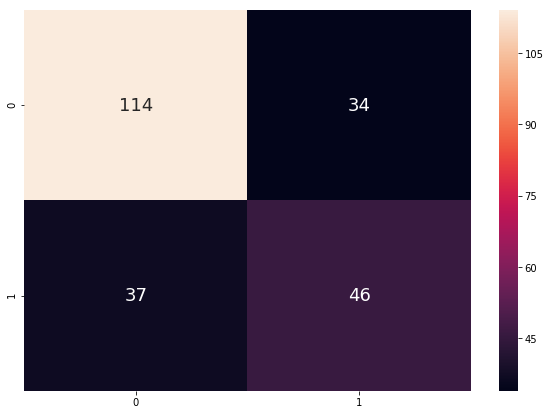

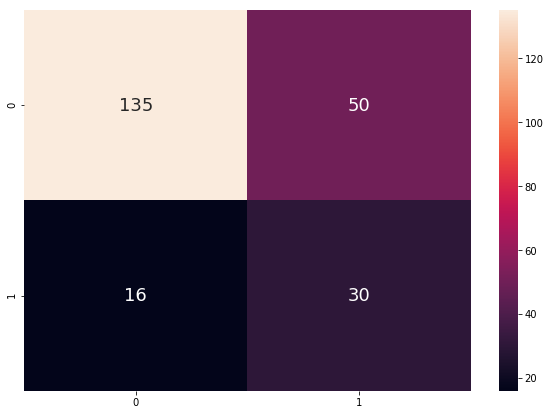

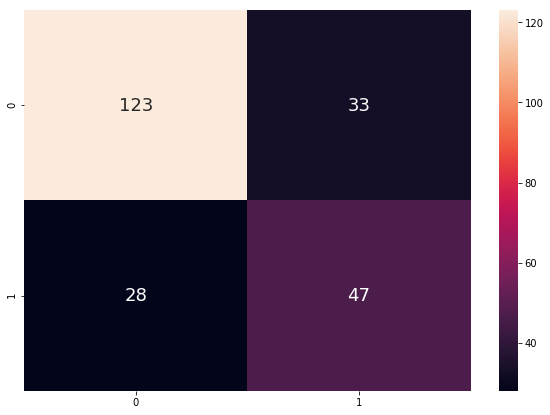

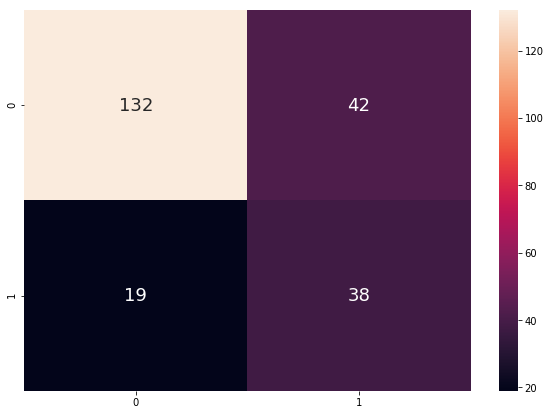

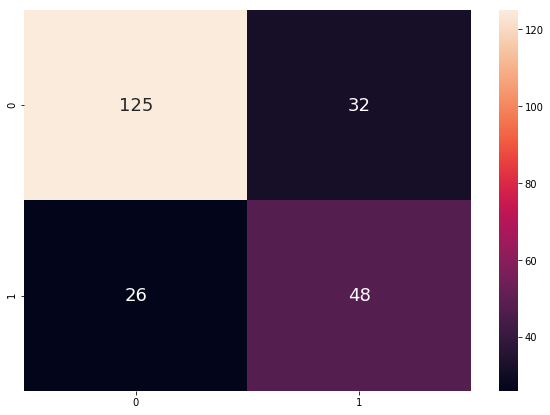

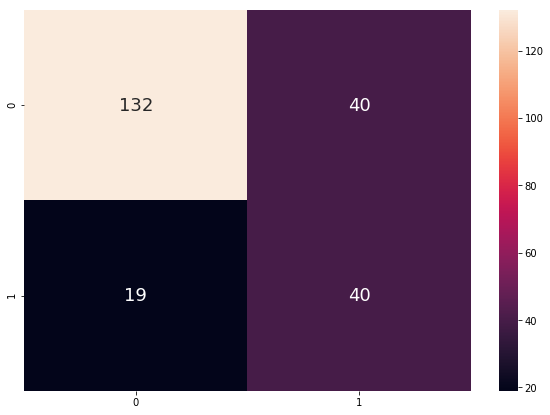

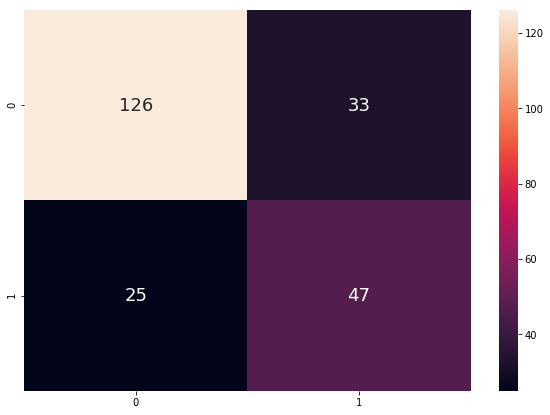

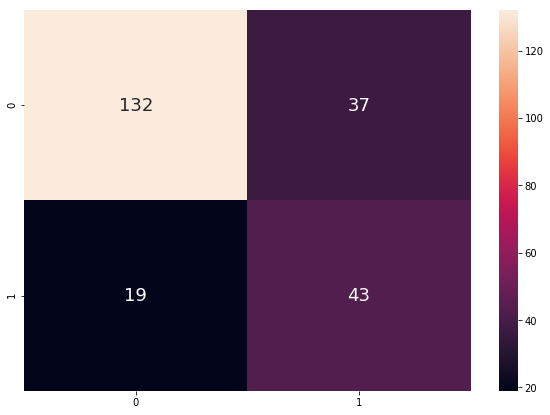

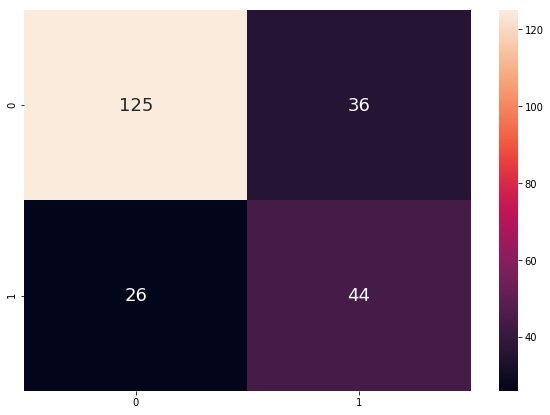

In [22]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
for x in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    knn.score(X_test,y_test)
    arr = sklearn.metrics.confusion_matrix(y_pred, y_test)
    ar = np.array(arr)
    df_cm = pd.DataFrame(ar)

    plt.figure(figsize = (10,7))
    gif = plt.gcf()
    sn.heatmap(df_cm, annot = True, fmt = '' ,annot_kws={"size": 18})
    gif.savefig("confusion" + str(x) + ".png")


In [23]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7489177489177489

In [24]:
#After scaling the insulin accuracy got increased by 3%. Without scaling the efficiecy was around 72%.
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.7575757575757576